In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from shapely.geometry import LineString
import utilities
import geopandas

In [2]:
geodf = geopandas.read_file('pa_collsion_per_traffic_191002.shp')
#geodf.to_file('pa_collsion_per_traffic_191002.shp', driver='ESRI Shapefile')

In [3]:
geodf.head()

,CUR_AADT,collision_,geometry
0,37768,0.000026,LINESTRING (-79.9197201057041 40.5979352880057...
1,7145,0.000140,LINESTRING (-79.9547751055742 40.4444171779927...
2,4494,0.000223,LINESTRING (-79.89587762102187 40.445347103532...
3,1376,0.000727,LINESTRING (-79.90204636284997 40.463871444125...
4,13954,0.000143,LINESTRING (-80.03588169337985 40.544586323724...


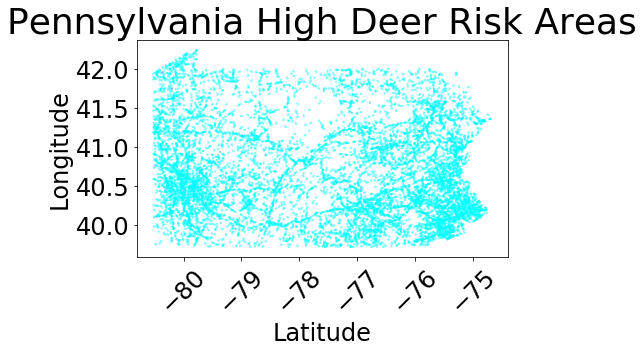

In [9]:
test = geodf.dropna(axis='rows', subset=['geometry']).sample(10000, random_state=0)
colors = plt.get_cmap('cool') # , lut=test.collision_per_aadt.max())
plt.figure(figsize=(8, 5))
_normal = test.collision_.max()

for index, row in test.iloc[:,:].iterrows(): 
    #poly = row.geometry.buffer(.0075, cap_style=3)
    #test_shape = poly.simplify(0.0001, preserve_topology=False)
    #x, y = poly.exterior.xy
    x, y = row.geometry.xy
    plt.plot(x, y, 
             color=colors(row.collision_/_normal),
             lw=2, alpha=.5)

plt.xlabel('Latitude', fontsize=24)
plt.ylabel('Longitude', fontsize=24)
plt.title('Pennsylvania High Deer Risk Areas', fontsize=36)
plt.xticks(fontsize=24, rotation=45)
plt.yticks(fontsize=24)
#plt.legend(loc='lower right')
#plt.colorbar()
plt.tight_layout()
#plt.savefig('pa_deer_collisions_per_avg_daily_traffic_191002-2.png', dpi=300)
None